In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [137]:
df = pd.read_csv('bitcoin_data.csv')
df.head(), df.shape

(           Date        Open        High         Low       Close  \
 0  Jan 02, 2025  $94,416.29  $97,739.82  $94,201.57  $96,886.88   
 1  Jan 01, 2025  $93,425.10  $94,929.86  $92,788.13  $94,419.76   
 2  Dec 31, 2024  $92,643.25  $96,090.60  $91,914.03  $93,429.20   
 3  Dec 30, 2024  $93,527.20  $94,903.32  $91,317.14  $92,643.21   
 4  Dec 29, 2024  $95,174.06  $95,174.88  $92,881.79  $93,530.23   
 
             Volume          Market Cap  
 0  $46,009,564,411  $1,918,730,145,567  
 1  $24,519,888,919  $1,869,850,163,161  
 2  $43,625,106,843  $1,850,183,342,119  
 3  $56,188,003,691  $1,834,643,033,989  
 4  $29,635,885,267  $1,852,119,372,624  ,
 (2558, 7))

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2558 non-null   object
 1   Open        2558 non-null   object
 2   High        2558 non-null   object
 3   Low         2558 non-null   object
 4   Close       2558 non-null   object
 5   Volume      2558 non-null   object
 6   Market Cap  2558 non-null   object
dtypes: object(7)
memory usage: 140.0+ KB


In [141]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2025-01-02,"$94,416.29","$97,739.82","$94,201.57","$96,886.88","$46,009,564,411","$1,918,730,145,567"
1,2025-01-01,"$93,425.10","$94,929.86","$92,788.13","$94,419.76","$24,519,888,919","$1,869,850,163,161"
2,2024-12-31,"$92,643.25","$96,090.60","$91,914.03","$93,429.20","$43,625,106,843","$1,850,183,342,119"
3,2024-12-30,"$93,527.20","$94,903.32","$91,317.14","$92,643.21","$56,188,003,691","$1,834,643,033,989"
4,2024-12-29,"$95,174.06","$95,174.88","$92,881.79","$93,530.23","$29,635,885,267","$1,852,119,372,624"
...,...,...,...,...,...,...,...
2553,2018-01-06,"$17,462.10","$17,712.40","$16,764.60","$17,527.00","$18,314,600,448","$294,217,423,675"
2554,2018-01-05,"$15,477.20","$17,705.20","$15,202.80","$17,429.50","$23,840,899,072","$292,544,135,538"
2555,2018-01-04,"$15,270.70","$15,739.70","$14,522.20","$15,599.20","$21,783,199,744","$261,795,321,110"
2556,2018-01-03,"$14,978.20","$15,572.80","$14,844.50","$15,201.00","$16,871,900,160","$255,080,562,912"


In [143]:
clean_col = ['Open','High', 'Low',  'Close', 'Volume', 'Market Cap']
for col in clean_col:
    invalid_values = df[col][~df[col].str.replace(r'[^\d.,]', '', regex=True).str.match(r'^\d+(\.\d+)?$')]
    print(f"Invalid values in {col}:")
    print(invalid_values)

Invalid values in Open:
0       $94,416.29
1       $93,425.10
2       $92,643.25
3       $93,527.20
4       $95,174.06
           ...    
2553    $17,462.10
2554    $15,477.20
2555    $15,270.70
2556    $14,978.20
2557    $13,625.00
Name: Open, Length: 2558, dtype: object
Invalid values in High:
0       $97,739.82
1       $94,929.86
2       $96,090.60
3       $94,903.32
4       $95,174.88
           ...    
2553    $17,712.40
2554    $17,705.20
2555    $15,739.70
2556    $15,572.80
2557    $15,444.60
Name: High, Length: 2558, dtype: object
Invalid values in Low:
0       $94,201.57
1       $92,788.13
2       $91,914.03
3       $91,317.14
4       $92,881.79
           ...    
2553    $16,764.60
2554    $15,202.80
2555    $14,522.20
2556    $14,844.50
2557    $13,163.60
Name: Low, Length: 2558, dtype: object
Invalid values in Close:
0       $96,886.88
1       $94,419.76
2       $93,429.20
3       $92,643.21
4       $93,530.23
           ...    
2553    $17,527.00
2554    $17,429.50
2555  

In [145]:
for col in clean_col:
    df[col] = df[col].str.replace(r'\$', '', regex=True)
    df[col] = df[col].str.replace(',', '', regex=True)
    df[col] = df[col].astype(float)
print(df.head())

        Date      Open      High       Low     Close        Volume  \
0 2025-01-02  94416.29  97739.82  94201.57  96886.88  4.600956e+10   
1 2025-01-01  93425.10  94929.86  92788.13  94419.76  2.451989e+10   
2 2024-12-31  92643.25  96090.60  91914.03  93429.20  4.362511e+10   
3 2024-12-30  93527.20  94903.32  91317.14  92643.21  5.618800e+10   
4 2024-12-29  95174.06  95174.88  92881.79  93530.23  2.963589e+10   

     Market Cap  
0  1.918730e+12  
1  1.869850e+12  
2  1.850183e+12  
3  1.834643e+12  
4  1.852119e+12  


In [147]:
for col in clean_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2558 non-null   datetime64[ns]
 1   Open        2558 non-null   float64       
 2   High        2558 non-null   float64       
 3   Low         2558 non-null   float64       
 4   Close       2558 non-null   float64       
 5   Volume      2558 non-null   float64       
 6   Market Cap  2558 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 140.0 KB


In [151]:
print(df.isnull().sum())

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64


In [153]:
df.describe()

,Date,Open,High,Low,Close,Volume,Market Cap
count,2558,2558.000000,2558.000000,2558.000000,2558.000000,2.558000e+03,2.558000e+03
mean,2021-07-03 12:00:00,28113.329636,28736.070801,27462.672412,28144.126333,2.696701e+10,5.377759e+11
min,2018-01-02 00:00:00,3236.270000,3275.380000,3191.300000,3236.760000,2.923670e+09,5.640069e+10
25%,2019-10-03 06:00:00,8951.990000,9202.585000,8794.830000,8987.437500,1.381597e+10,1.601963e+11
50%,2021-07-03 12:00:00,22206.585000,22637.850000,21571.645000,22220.285000,2.408015e+10,4.258698e+11
75%,2023-04-03 18:00:00,42841.917500,43664.272500,41974.700000,42847.085000,3.536081e+10,8.253899e+11
max,2025-01-02 00:00:00,106147.300000,108268.450000,105291.740000,106140.600000,3.509679e+11,2.101345e+12
std,NaN,22176.352570,22668.338983,21680.182851,22213.926069,1.965220e+10,4.376007e+11


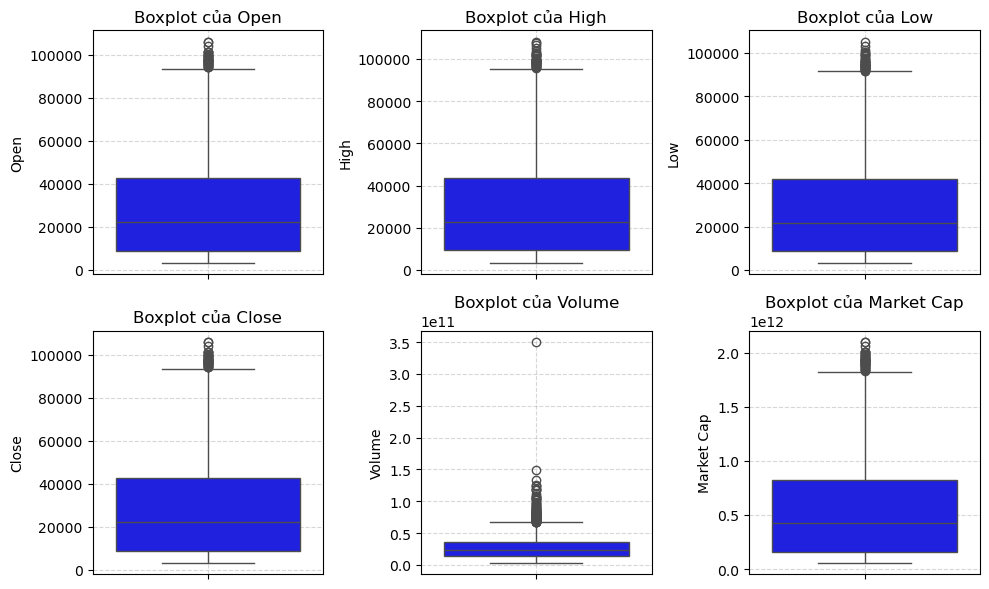

In [155]:
# Vẽ boxplot kiểm tra outliers
plt.figure(figsize=(10,6))
for i, col in enumerate(clean_col, 1):
    plt.subplot(2, 3, i) # 2 hàng, 3 cột 
    sns.boxplot(data=df, y=col, color='blue')
    plt.title(f"Boxplot của {col}")
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Nhận xét:
- Các biến open, hight, low, close có phân phối khá tập trung với một số giá trị outliers nằm phía trên, nằm xa giá trị trung bình và đường whisker, thể hiện các giá trị bất thường
- Volume, Market cap phân phối rất lệch với nhiều outliers phía trên.

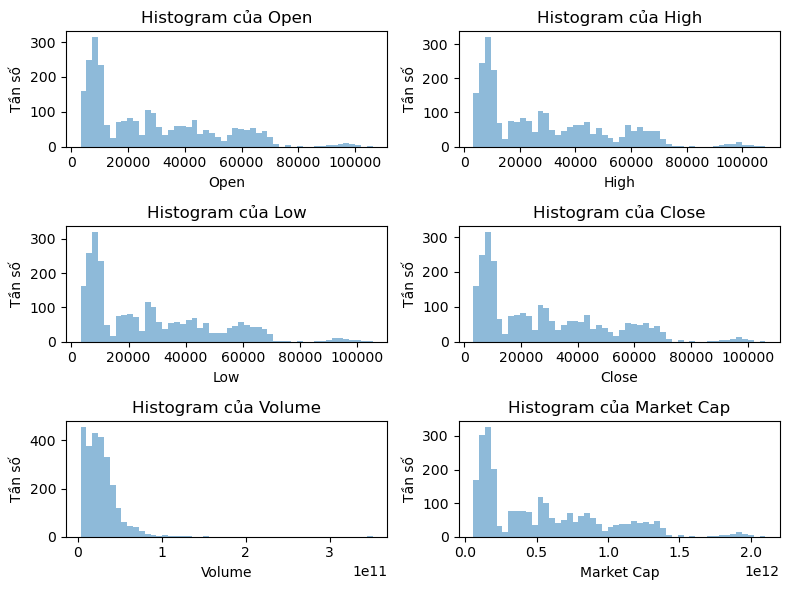

In [158]:
# Vẽ histogram kiểm tra phân bố dữ liệu 
plt.figure(figsize=(8,6))
for i, col in enumerate(clean_col, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[col], bins=50, alpha=0.5)
    plt.title(f"Histogram của {col}")
    plt.xlabel(col)
    plt.ylabel('Tần số')
    plt.savefig('bitcoin_phanbo.png')
plt.tight_layout()
plt.show()

Nhận xét:
- Dữ liệu của Open, High, Low, Close có phân bố lệch phải cho thấy giá trị bitcoin có xu hướng tăng theo thời gian
- Volume, Market Cap có sự phân bố rộng với một số điểm vượt xa phần còn lại, xác nhận sự tồn tại của outliers


In [160]:
# IQR
def remove_outliers(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Loại bỏ outliers cho tất cả các cột giá trị
clean_data = df.copy()
for col in clean_col:
    clean_data = remove_outliers(clean_data, col)

# Kiểm tra số lượng dữ liệu sau khi loại bỏ outliers
row = len(df) - len(clean_data)

print(f"Dữ liệu giảm: {row}")
print(clean_data.shape)

Dữ liệu giảm: 122
(2436, 7)


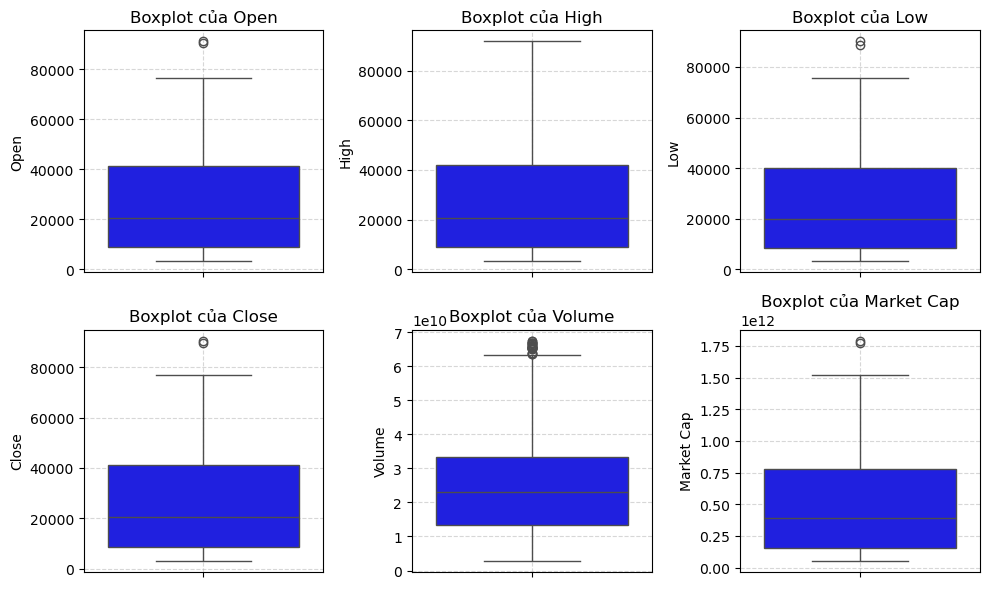

In [161]:
# Vẽ boxplot sau khi thay thế outliers
plt.figure(figsize=(10,6))
for i, col in enumerate(clean_col, 1):
    plt.subplot(2, 3, i) # 2 hàng, 3 cột 
    sns.boxplot(data=clean_data[clean_col], y=col, color='blue')
    plt.title(f"Boxplot của {col}")
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [165]:
# Tính ma trận tương quan
mttq = clean_data.corr()
mttq

,Date,Open,High,Low,Close,Volume,Market Cap
Date,1.000000,0.764310,0.761664,0.768213,0.764383,0.357627,0.778905
Open,0.764310,1.000000,0.999460,0.999336,0.998833,0.464553,0.998276
High,0.761664,0.999460,1.000000,0.999174,0.999531,0.472723,0.998761
Low,0.768213,0.999336,0.999174,1.000000,0.999402,0.455679,0.999078
Close,0.764383,0.998833,0.999531,0.999402,1.000000,0.465891,0.999397
Volume,0.357627,0.464553,0.472723,0.455679,0.465891,1.000000,0.457237
Market Cap,0.778905,0.998276,0.998761,0.999078,0.999397,0.457237,1.000000


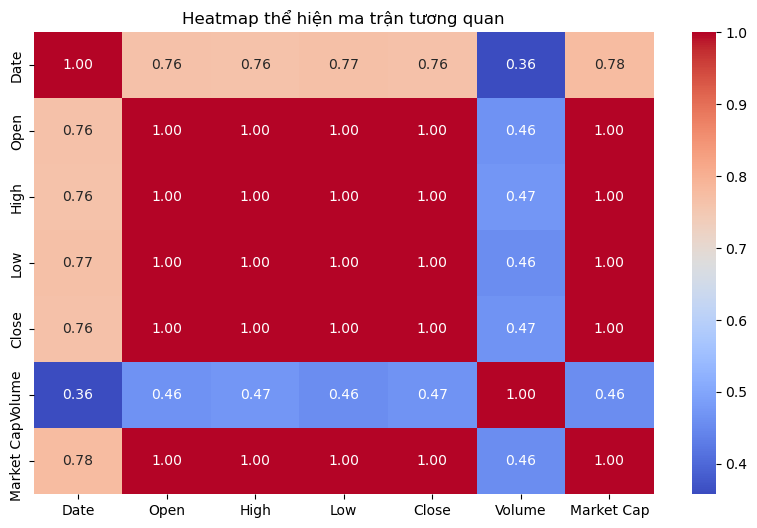

In [167]:
# Vẽ heatmap thể hiện tương quan
plt.figure(figsize=(10,6))
sns.heatmap(mttq, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap thể hiện ma trận tương quan")
plt.savefig('hheatmap.png')
plt.show()

In [169]:
## Vẽ biểu đồ phân bố biến Close và Volume
# plt.figure(figsize=(14, 6))

# # Biểu đồ phân bố biến Close
# plt.subplot(1, 2, 1)
# sns.histplot(clean_data['Close'], kde=True, bins=30)
# plt.title('Phân bố biến Close')
# plt.xlabel('Giá đóng cửa (Close)')
# plt.ylabel('Tần suất')

# # Biểu đồ phân bố biến Volume
# plt.subplot(1, 2, 2)
# sns.histplot(clean_data['Volume'], kde=True, bins=30)
# plt.title('Phân bố biến Volume')
# plt.xlabel('Khối lượng giao dịch (Volume)')
# plt.ylabel('Tần suất')
# plt.savefig('phanbo.png')
# plt.tight_layout()
# plt.show()

In [171]:
# Chuẩn hóa dữ liệu
model = StandardScaler()
X_scaled = model.fit_transform(clean_data[clean_col])

In [173]:
#PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

## Tỷ lệ phương sai giải thích 
explained_variance = pca.explained_variance_ratio_ # % thông tin của dữ liệu gốc đc giữ lại bởi các tp chính này
print("Tỷ lệ phương sai giải thích: ", explained_variance)
print("Tỷ lệ phương sai tích lũy (cộng dồn):", explained_variance.cumsum())

Tỷ lệ phương sai giải thích:  [8.74832701e-01 1.24624327e-01 3.24655496e-04 1.14105463e-04
 8.41892352e-05 2.00218027e-05]
Tỷ lệ phương sai tích lũy (cộng dồn): [0.8748327  0.99945703 0.99978168 0.99989579 0.99997998 1.        ]


In [175]:
# Lựa chọn số tp chính (tỷ lệ >= 95%)
n_components = np.argmax(explained_variance.cumsum() >= 0.95) + 1
print(f"Số lượng thành phần chính được chọn: {n_components}")

Số lượng thành phần chính được chọn: 2


In [177]:
# Giảm chiều dữ liệu với số lượng thành phân chính đã chọn
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca_reduced, columns=['PC1', 'PC2'])

In [181]:
df_pca = pd.concat([pca_df, df[['Close']]], axis=1)
df_pca

,PC1,PC2,Close
0,7.331255,-0.214180,96886.88
1,7.377006,-0.370281,94419.76
2,5.575441,-1.027956,93429.20
3,5.986331,0.744955,92643.21
4,6.056398,1.321781,93530.23
...,...,...,...
2553,NaN,NaN,17527.00
2554,NaN,NaN,17429.50
2555,NaN,NaN,15599.20
2556,NaN,NaN,15201.00


In [183]:
print(df_pca.isnull().sum())

PC1      122
PC2      122
Close      0
dtype: int64


In [185]:
df_pca = df_pca.ffill()
print(df_pca.isnull().sum())

PC1      0
PC2      0
Close    0
dtype: int64


In [187]:
# Chuẩn bị dữ liệu 
X= df_pca.drop(columns=['Close'])
y = df_pca['Close']

# Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
#Khởi tạo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [191]:
# Dự đoán trên tập test
y_pred = model_lr.predict(X_test)

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 7895.89
RMSE: 11077.21
R²: 0.73


C:\Users\Thu Ngan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


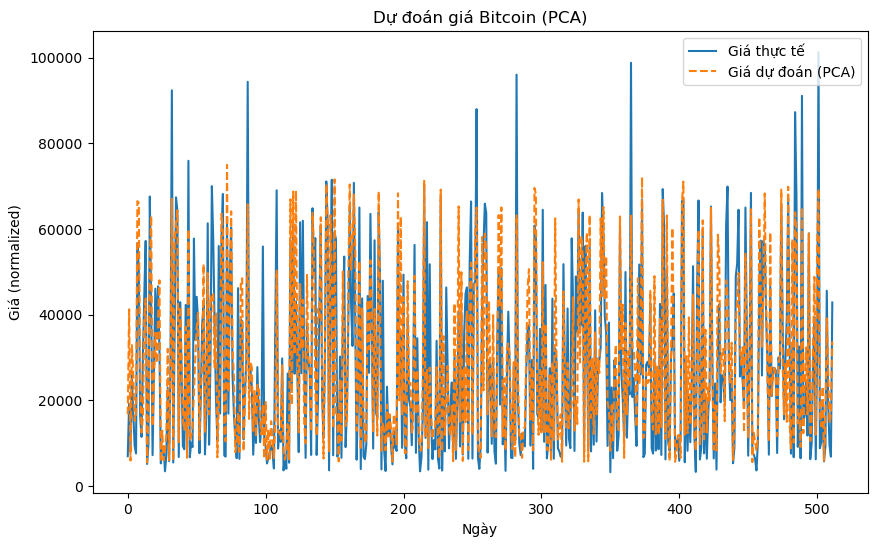

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Giá thực tế')
plt.plot(y_pred, label='Giá dự đoán (PCA)', linestyle='--')
plt.title("Dự đoán giá Bitcoin (PCA)")
plt.xlabel("Ngày")
plt.ylabel("Giá (normalized)")
plt.legend()
plt.show()

In [323]:
# Nếu đuọc làm thêm tăng cường đặc trưng để dự đoán chính xác hơn 

In [195]:
# Khởi tạo mô hình Random Forest 
model_rf = RandomForestRegressor(n_estimators= 20,max_depth=5,random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=42)

In [197]:
# dự đoán 
y_pred_rf = model_rf.predict(X_test)

# đánh giá mo hình 
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MAE: {mae_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'R²: {r2_rf:.2f}')

MAE: 6450.71
RMSE: 9638.96
R²: 0.80


C:\Users\Thu Ngan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


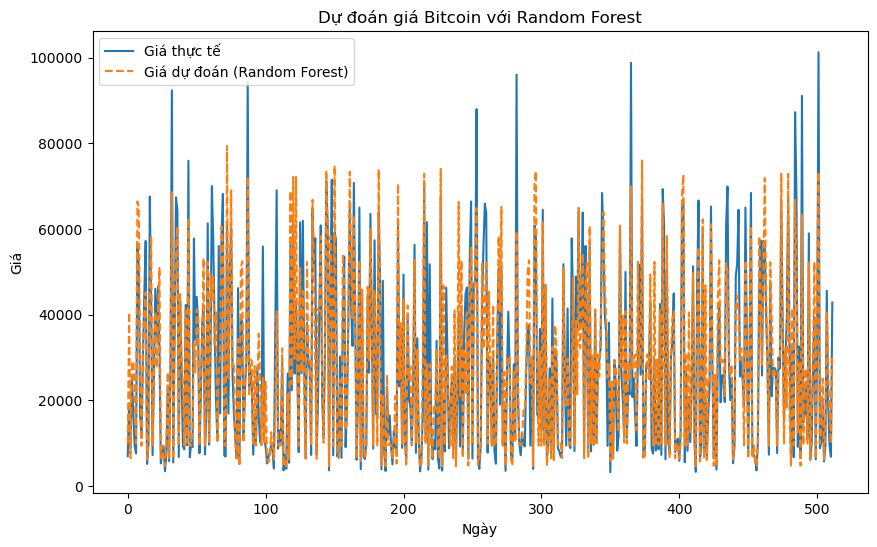

In [199]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Giá thực tế')
plt.plot(y_pred_rf, label='Giá dự đoán (Random Forest)', linestyle='--')
plt.title("Dự đoán giá Bitcoin với Random Forest")
plt.xlabel("Ngày")
plt.ylabel("Giá")
plt.legend()
plt.show()

In [331]:
#pip install tensorflow

In [333]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import random
import tensorflow as tf

In [335]:
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

In [371]:
#Chuẩn hóa dữ liệu về pham vi [0,1]
model_mn = MinMaxScaler(feature_range=(0,1))
data  = model_mn.fit_transform(df[['Close']].values)

In [373]:
# Chia tập dữ liệu 
train_sz = int(len(data) * 0.8) #lấy 80% dl 
train_dt = data[:train_sz] # lấy % đầu
test_dt = data[train_sz:] # lấy % còn lại

In [375]:
#tạo bộ dl theo time 
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])  # 30 ngày trước đó
        y.append(dataset[i + time_step, 0])      # Dự đoán ngày tiếp theo
    return np.array(X), np.array(y)

# áp dụng 
time_step = 30
X_train_mn, y_train_mn = create_dataset(train_dt, time_step)
X_test_mn, y_test_mn = create_dataset(test_dt, time_step)

In [377]:
# định dạng lại dl
X_train_mn = X_train_mn.reshape((X_train_mn.shape[0], X_train_mn.shape[1], 1)) #samples, time steps, features =1
X_test_mn = X_test_mn.reshape((X_test_mn.shape[0], X_test_mn.shape[1], 1))

In [379]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(Dropout(0.2))  # Dropout để tránh overfitting
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))  # Đầu ra là một giá trị (giá dự đoán)

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Thu Ngan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [381]:
train = model_lstm.fit(X_train_mn, y_train_mn, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
#epochs:số vòng huấn luyện, batch_size: số lượng mẫu sd, vadidation_data: theo dõi hiệu suất 

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0261 - val_loss: 1250268160.0000
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020 - val_loss: 1250267392.0000
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - val_loss: 1250266880.0000
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 1250266240.0000
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 1250265344.0000
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - val_loss: 1250264704.0000
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - val_loss: 1250264064.0000
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 1250263168.0000
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 1250262656.0000
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 1250261504.0000
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss:

In [383]:
y_pred_lstm = model_lstm.predict(X_test_mn)
y_pred_lstm = model_mn.inverse_transform(y_pred_lstm)  # Đưa dự đoán về giá trị thực
y_test_mn = model_mn.inverse_transform(y_test_mn.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [385]:
mae_lstm = mean_absolute_error(y_test_mn, y_pred_lstm)
rmse_lstm = mean_squared_error(y_test_mn, y_pred_lstm, squared=False)
r2_lstm = r2_score(y_test_mn, y_pred_lstm)

print(f'MAE: {mae_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'R²: {r2_lstm:.2f}')

MAE: 768.45
RMSE: 836.66
R²: 0.89


C:\Users\Thu Ngan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


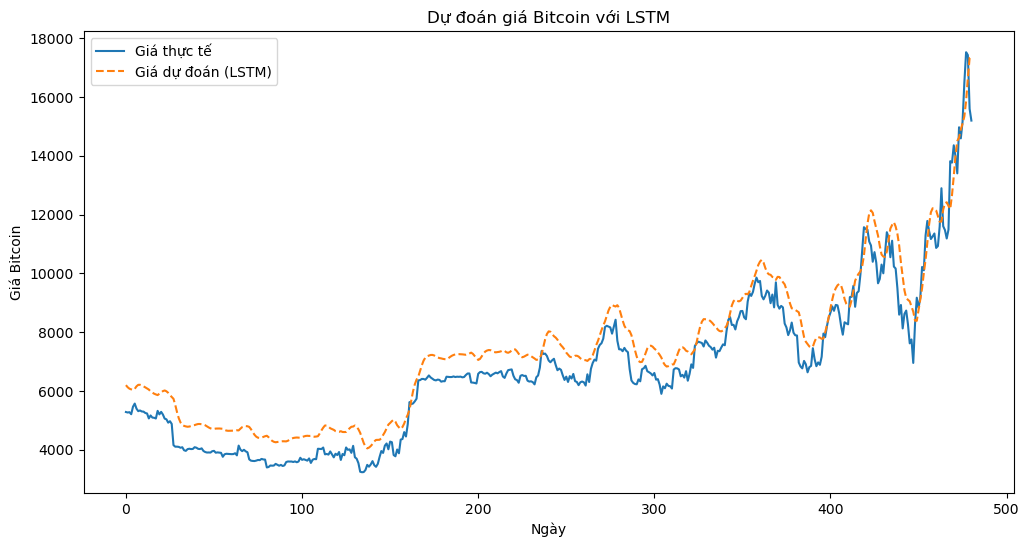

In [387]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_mn, label='Giá thực tế')
plt.plot(y_pred_lstm, label='Giá dự đoán (LSTM)', linestyle='--')
plt.title("Dự đoán giá Bitcoin với LSTM")
plt.xlabel("Ngày")
plt.ylabel("Giá Bitcoin")
plt.legend()
plt.show()

In [407]:
#Lấy 30 ngày gần nhất
seq = 30

# dl mới
data_new = data[:seq] #cắt từ đầu đến vị trí trc 30 
data_new = np.reshape(data_new, (1, seq, 1))
#dự đoán giá
price = model_lstm.predict(data_new)
price = model_mn.inverse_transform(price)

print(f"Giá Bitcoin dự đoán: {price[0][0]: .2f} USD")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Giá Bitcoin dự đoán:  94246.61 USD
